In [245]:
# Data analysis imports
import pandas as pd
import math
import numpy as np

# Plot imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
db = pd.read_csv('data/netflix_titles.csv', index_col = 'show_id')
print(db.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB
None


In [133]:
print(db.nunique())

type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


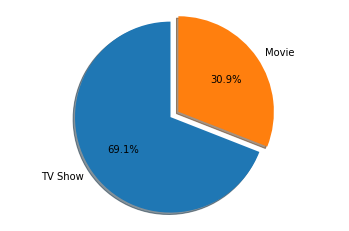

In [132]:
labels = db['type'].unique()
sizes = db['type'].value_counts().to_list()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode = explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');

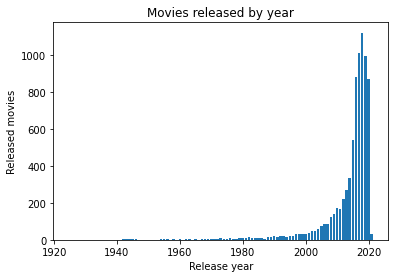

In [184]:
release_year = db['release_year']
year_groups = db.groupby('release_year')
amount = list(map(lambda x: len(x), year_groups.groups.values()))
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Release year')
ax2.set_ylabel('Released movies')
ax2.set_title('Movies released by year')
ax2.bar(year_groups.groups.keys(), amount);

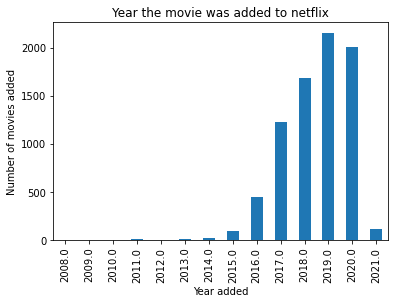

In [189]:
db['date_added'] = pd.to_datetime(db['date_added'])
dates_added_in_years = db['date_added'].groupby(db['date_added'].dt.year, dropna = True)
db['date_added'].groupby(db["date_added"].dt.year).count().plot(kind="bar", x = dates_added_in_years.keys, 
                                                                ylabel = 'Number of movies added', 
                                                                xlabel = 'Year added',
                                                               title = 'Year the movie was added to netflix');

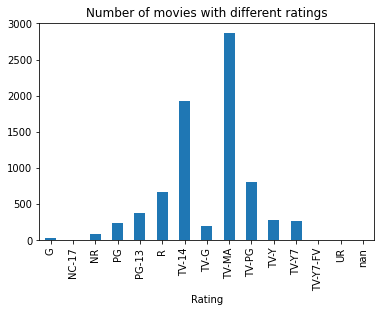

In [265]:
db['rating'].groupby(db['rating'], dropna = False).count().plot(kind = "bar",
xlabel = 'Rating', title = 'Number of movies with different ratings');

array([<AxesSubplot:title={'center':'Movie'}>,
       <AxesSubplot:title={'center':'TV Show'}>], dtype=object)

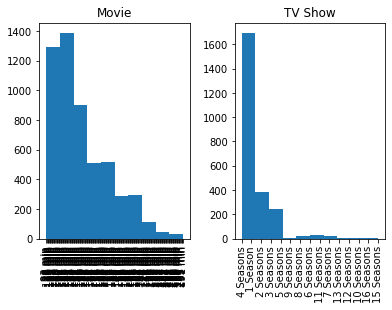

In [305]:
db['duration'].hist(by = db['type'])